In [ ]:
!pip install pytrends

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pytrends.request import TrendReq

sns.set_theme()

## Jak używać google trends?

Załóżmy, że interesują nas dwa słowa kluczowe: *fontanna ogrodowa* oraz *fontanna pokojowa*, w okresie od 1 stycznia 2018 do 1 kwietnia 2021:

In [74]:
# key words list
kw_list = ['fontanna ogrodowa', 'fontanna pokojowa']

pytrends = TrendReq()
pytrends.build_payload(kw_list = kw_list, timeframe='2018-01-01 2021-04-01', geo='PL')

Teraz kiedy mammy obiekt pytrends, możemy pobrać względną liczbę wyszukań tych słów

In [75]:
trends = pytrends.interest_over_time()

Metoda interest_over_time() zwraca słownik, w którym kluczami są elementy listy kw_list (słowa kluczowe) zaś wartościami są pandas.Series().

In [76]:
trends['fontanna ogrodowa']

date
2018-01-07     0
2018-01-14     5
2018-01-21     0
2018-01-28     5
2018-02-04    21
              ..
2021-02-28     5
2021-03-07    18
2021-03-14    26
2021-03-21    27
2021-03-28    19
Name: fontanna ogrodowa, Length: 169, dtype: int32

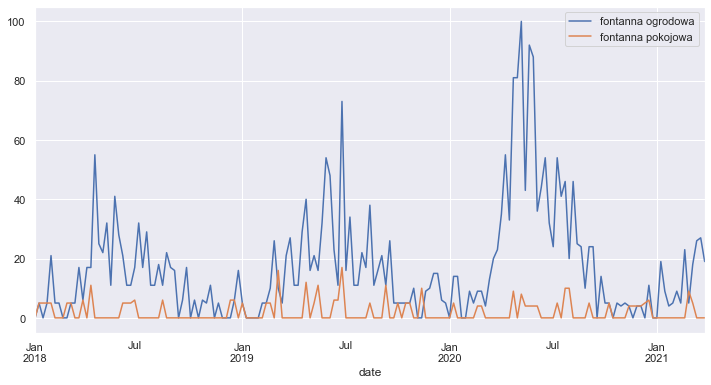

In [92]:
plt.figure(figsize = (12,6))
for key in kw_list:
    trends[key].plot(label=key)
plt.legend()
plt.show()

Dane są reprezentowane w odstępnach tygodniowych. Liczby na osi Y prezentują *względą* liczbę zapytań - 100 oznacza maksimum zapytań w danym okresie czasu, dla danych słów kluczowych.

Jeśli chcemy, możemy oczywiście łatwo zagregować dane w dłuższe okresy czasu, np. kolejne miesiące:

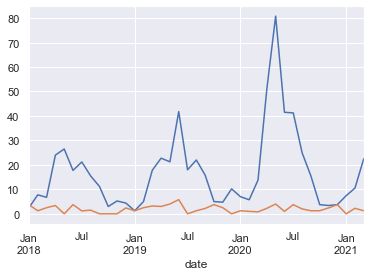

In [93]:
freq = 'MS'
for key in kw_list:
    trends[key].resample(freq).mean().plot(label=key)

lub lata:

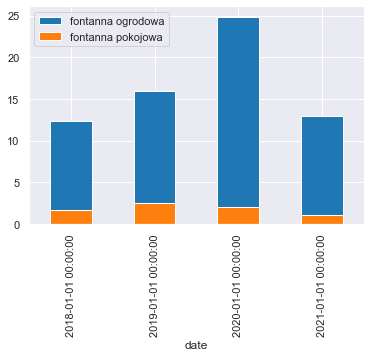

In [114]:
freq = 'YS'
colors = ['#1f77b4', '#ff7f0e']

for key, col in zip(kw_list, colors):
    trends[key].resample(freq).mean().plot(label=key, kind='bar', color=col)
plt.legend()
plt.show()

## Porównanie google trends oraz sprzedaży Shumee

In [2]:
with open('./data/clustered_products.json') as json_file:
    clustered_products = json.load(json_file)
    
df = pd.read_excel('./data/shumee_mckinsey -Aktualizacja 01.03.xlsx', index_col=None, engine='openpyxl')

In [3]:
# The first day Shumee started gathering the data
first_day = df["Data"].dt.date.min()
# The last day
last_day = df["Data"].dt.date.max()

dti_weeks = pd.date_range(start=first_day, end=last_day, freq="W")

In [16]:
search_for = "*żyrandol*"
for i in range(len(clustered_products)):
    if search_for in clustered_products[i]:
        print(i)
        break

In [24]:
clustered_products[7]

['Bawełniany dywan ø 140 cm wielokolorowy YENICE',
 'Dywan, niebiesko-pomarańczowy, 160 x 230 cm, PP',
 'Dywan, niebiesko-pomarańczowy, 80 x 150 cm, PP',
 'Dywan, niebieski, 80 x 150 cm, PP',
 'Dywan, niebieski, 120 x 170 cm, PP',
 'Dywan, niebieski, 140 x 200 cm, PP',
 'Dywan, czerwony, 80 x 150 cm, PP',
 'Dywan, czerwony, 120 x 170 cm, PP',
 'Dywan, szaro-czerwony, 160 x 230 cm, PP',
 'Dywan, szaro-czerwony, 120 x 170 cm, PP',
 'Dywan, szaro-czerwony, 80 x 150 cm, PP',
 'Dywan, szaro-czerwony, 140 x 200 cm, PP',
 'Dywan PERVOI, szary, 140x200 cm',
 'Dywan PERVOI, szary, 80x150 cm',
 'Dywan PERVOI, szary, 120x170 cm',
 'Dywan, szaro-beżowy, 120 x 170 cm, PP',
 'Dywan PERVOI, 120x170 cm',
 'Dywan, szaro-czarny, 160 x 230 cm, PP',
 'Dywan, szaro-czarny, 80 x 150 cm, PP',
 'Czerwony dywan, 1 x 5 m, bardzo ciężki, 400 g/m2',
 'Dywan bawełniany 160 x 230 cm szary BESNI',
 'Dywan bawełniany 80 x 150 cm brązowy TUZLA',
 'Okrągły dywan bawełniany ø 140 cm wielokolorowy LA',
 'Okrągły dywan ba

Mam tutaj jedną uwagę - pierwszy klaster (fontanny) wygląda bardzo spoko, ale oprócz fontann do basenu zawiera też coś całkiem innego - fontannę czekoladową, która jednak powinna się znaleźć w innej kategorii. Podobnie nie jestem pewny, czy fontanna ogrodowa i pokojowa to ta sama kategoria.

In [35]:
cluster_number = 0

sells = df[df["Nazwa produktu"].map(lambda x: x in clustered_products[cluster_number])]

sells = sells.groupby(df["Data"].dt.date)["ID zamówienia"].nunique()
sells = sells.reindex(dti_weeks, fill_value = 0)

In [36]:
pytrends = TrendReq()
pytrends.build_payload(kw_list = ['fontanna'], timeframe=str(first_day)+' '+str(last_day), geo='PL')

pytrends = pytrends.interest_over_time().drop("isPartial", axis=1)

In [37]:
pytrends

,fontanna
date,
2018-03-04,30
2018-03-11,35
2018-03-18,29
2018-03-25,42
2018-04-01,45
...,...
2021-01-31,32
2021-02-07,24
2021-02-14,22


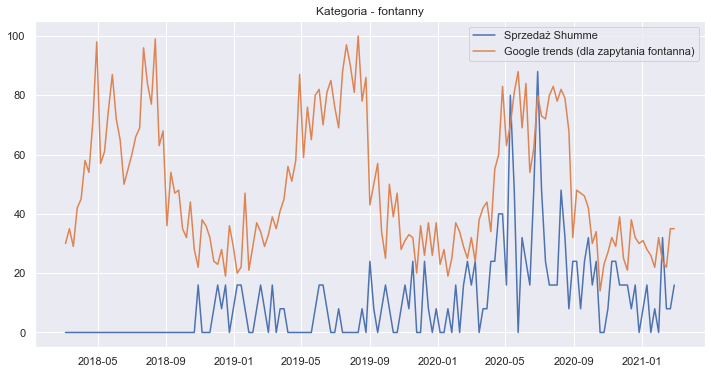

In [41]:
fig, ax = plt.subplots(1, 1, figsize = (12,6))

ax.plot(8*sells, label = "Sprzedaż Shumme")
ax.plot(pytrends, label = "Google trends (dla zapytania fontanna)")

plt.legend()
plt.title("Kategoria - fontanny")
plt.show()

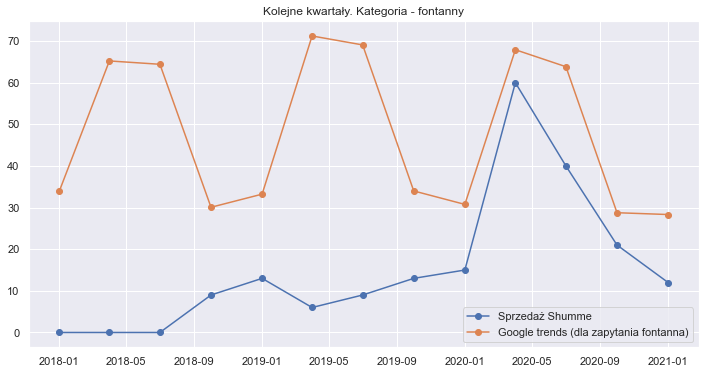

In [39]:
fig, ax = plt.subplots(1, 1, figsize = (12,6))

ax.plot(sells.resample('QS').sum(), label = "Sprzedaż Shumme", marker="o")
ax.plot(pytrends.resample('QS').mean(), label = "Google trends (dla zapytania fontanna)",  marker="o")

plt.legend()
plt.title("Kolejne kwartały. Kategoria - fontanny")
plt.show()

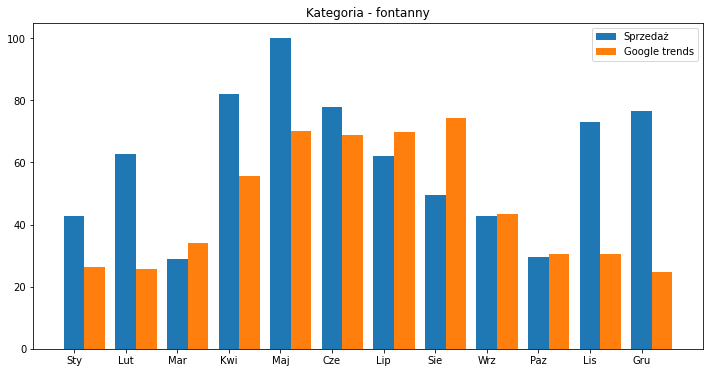

In [61]:
grid = np.array([i + 1.0 for i in range(12)])
width = 0.4
fig, ax = plt.subplots(1, 1, figsize = (12,6))

ax.bar(grid, 100*sells_monthly / sells_monthly.max(), width,
       label = "Sprzedaż", tick_label = "Sty Lut Mar Kwi Maj Cze Lip Sie Wrz Paz Lis Gru".split(" "))

ax.bar(grid + width, pytrends_df.groupby(pytrends_df.index.month)["fontanna"].mean(), width,
       label = "Google trends")

plt.legend()
plt.title("Kategoria - fontanny")
plt.show()